# Example 3.2: Pull-out - RILEM test recalculation
## BC1, support at the loaded end, piecewise linear bond-slip law

In [2]:
%reset -f
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
from bmcs.api import PullOutModel

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


## Model parameters
Let us consider the case of the RILEM pullout test with the boundary condition with the following material parameters 
\begin{align}
d &= 16\;\mathrm{mm} \\
E_\mathrm{f} &= 210\;\mathrm{GPa} \\
E_\mathrm{m} &= 28\;\mathrm{GPa} \\
A_\mathrm{f} &= \pi (\frac{d}{2})^2 \;\mathrm{mm}^2 \\
A_\mathrm{m} &= (10d)^2 \;\mathrm{mm}^2 \\
p &= \pi d
\end{align}

In [3]:
d = 16.0 # [mm]
E_f = 210000 # [MPa]
E_m = 28000 # [MPa]

## Construct the finite element pullout model
The model uses a multilinear bond-slip law specified by the attributes 
s_arr and tau_arr specifying the pairs of slip and bond stress values.

In [4]:
pm = PullOutModel(mats_eval_type='multilinear',
                  n_e_x=50, k_max=200, w_max=0.1)
pm.tline.step = 0.005
pm.tloop.verbose = False
pm.loading_scenario.loading_type='monotonic'
pm.mats_eval.s_tau_table = [[0, 0.0001, 0.1],
                            [0, 3.0, 8.0]]

## Plot the current bond-slip law

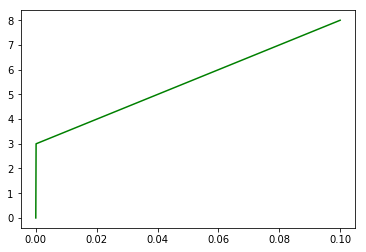

In [5]:
pm.mats_eval.bs_law.plot(plt, color='green')

calculating for length = 5 x 16 mm
calculating for length = 10 x 16 mm
calculating for length = 3 x 28 mm


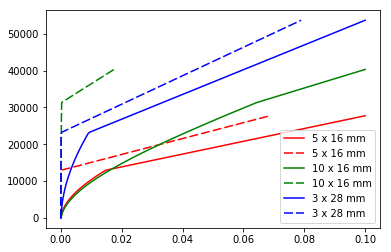

In [6]:
colors = ['red','green','blue']
length_factors = [5.,10.,3.]
diameters = [16.,16.,28.]
for f,d,c in zip(length_factors,diameters,colors):
    print('calculating for length = %g x %g mm' % (f, d))
    pm.geometry.L_x = f*d
    r = d / 2.0
    A_f = np.pi * r**2
    p = np.pi * d
    A_m = (10 * d)**2
    pm.cross_section.trait_set(A_f=A_f, P_b=p, A_m=A_m)
    pm.run()
    P,w_0,w_1 =  pm.get_Pw_t()
    plt.plot(w_1,P,color=c,label='%g x %g mm' % (f, d))
    plt.plot(w_0,P,color=c,label='%g x %g mm' % (f, d), dashes=[6, 2])
plt.legend()
plt.show()

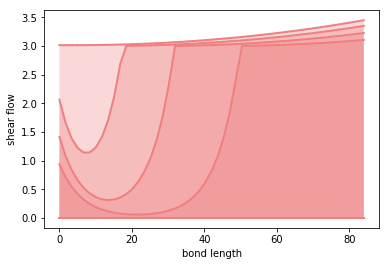

In [7]:
ax = plt.axes()
for t in np.linspace(0.,.1,5):
    pm.plot_sf(ax,t)
plt.show()

# Questions and Tasks

### 1 Material behavior and structural response
All three calculated tests share the same bond-slip law. The test with $d = 28\;\mathrm{mm}$ and embedded length of $3d$ exhibits a similar shape as the bond-slip law. Why? 

### 2 Identification of the bond-slip law
What possibilities are there to derive the bond slip law from the experimental observation. What trade-offs are involved in the design of the calibration test setup?

### 3 Identify the anchorage length for $d = 16\mathrm{mm}$

calculating for length = 5 x 16 mm
calculating for length = 10 x 16 mm
calculating for length = 15 x 16 mm
calculating for length = 20 x 16 mm
F_yield 100530.96491487337


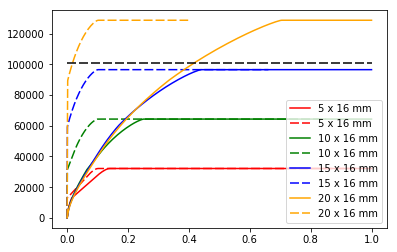

In [8]:
colors = ['red','green','blue','orange']
length_factors = [5.,10.,15., 20.]
diameters = [16.,16.,16.,16.]
pm.w_max = 1.0
## COPY here the loop over the parameter values from above
for f,d,c in zip(length_factors,diameters,colors):
    print('calculating for length = %g x %g mm' % (f, d))
    pm.geometry.L_x = f*d
    r = d / 2.0
    A_f = np.pi * r**2
    p = np.pi * d
    A_m = (10 * d)**2
    pm.cross_section.trait_set(A_f=A_f, P_b=p, A_m=A_m)
    pm.run()
    P, w_0,w_1 =  pm.get_Pw_t()
    plt.plot(w_1,P,color=c,label='%g x %g mm' % (f, d))
    plt.plot(w_0,P,color=c,label='%g x %g mm' % (f, d), dashes=[6, 2])
F_yield = A_f * 500.0
print('F_yield', F_yield)
plt.plot([0,1.0],[F_yield,F_yield], color = 'black', dashes=[6,2])
plt.legend()
plt.show()